In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('seabirds.csv')

In [4]:
df

,Unnamed: 0,lat,lon,alt,unix,bird,species,year,date_time,max_depth.m,colony2,coverage_ratio,is_dive,is_dive_1m,is_dive_2m,is_dive_4m,is_dive_5m,is_dive_0m
0,1,56.095451,-6.233089,-23.059999,1340627854,1,tCOGU,t2012,2012-06-25 13:37:34,-2.172046,1,0.5,False,False,False,False,False,False
1,2,56.095408,-6.233520,-2.983077,1340627954,1,tCOGU,t2012,2012-06-25 13:39:14,-1.152306,1,0.6,False,False,False,False,False,False
2,3,56.095437,-6.234275,3.470286,1340628054,1,tCOGU,t2012,2012-06-25 13:40:54,-2.172046,1,0.7,False,False,False,False,False,False
3,4,56.095635,-6.234815,1.902667,1340628154,1,tCOGU,t2012,2012-06-25 13:42:34,-2.172046,1,0.8,False,False,False,False,False,False
4,5,56.095821,-6.235293,2.824952,1340628254,1,tCOGU,t2012,2012-06-25 13:44:14,-2.172046,1,0.9,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263713,263714,57.380016,-1.876185,38.550566,1339500344,108,tCOGU,t2012,2012-06-12 12:25:44,-1.152306,10,NaN,False,False,False,False,False,False
263714,263715,57.380147,-1.876534,32.490545,1339500444,108,tCOGU,t2012,2012-06-12 12:27:24,-1.152306,10,NaN,False,False,False,False,False,False
263715,263716,57.380096,-1.876400,38.292069,1339500544,108,tCOGU,t2012,2012-06-12 12:29:04,1.906914,10,NaN,False,True,False,False,False,True
263716,263717,57.380045,-1.876275,38.851776,1339500644,108,tCOGU,t2012,2012-06-12 12:30:44,-2.172046,10,NaN,False,False,False,False,False,False


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263718 entries, 0 to 263717
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      263718 non-null  int64  
 1   lat             263718 non-null  float64
 2   lon             263718 non-null  float64
 3   alt             263718 non-null  float64
 4   unix            263718 non-null  int64  
 5   bird            263718 non-null  int64  
 6   species         263718 non-null  object 
 7   year            263718 non-null  object 
 8   date_time       263718 non-null  object 
 9   max_depth.m     263718 non-null  float64
 10  colony2         263718 non-null  int64  
 11  coverage_ratio  262648 non-null  float64
 12  is_dive         263718 non-null  bool   
 13  is_dive_1m      263718 non-null  bool   
 14  is_dive_2m      263718 non-null  bool   
 15  is_dive_4m      263718 non-null  bool   
 16  is_dive_5m      263718 non-null  bool   
 17  is_dive_0m

In [7]:
import matplotlib.pyplot as plt
import mplcyberpunk
plt.style.use('cyberpunk')

In [9]:
df.species.value_counts()

tRAZO    162414
tCOGU     63925
tEUSH     37379
Name: species, dtype: int64

In [14]:
import numpy as np
import plotly.express as px
import seaborn as sns

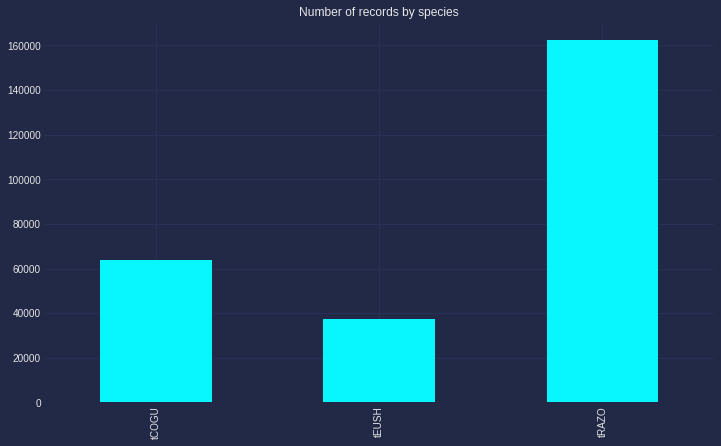

In [20]:
plt.figure(figsize = (12,7))
df.species.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of records by species')
plt.show()

In [21]:
df.colony2.value_counts()

1     89131
2     43002
9     40166
6     33890
5     19335
7     13785
3     10996
10     6506
4      3674
8      3233
Name: colony2, dtype: int64

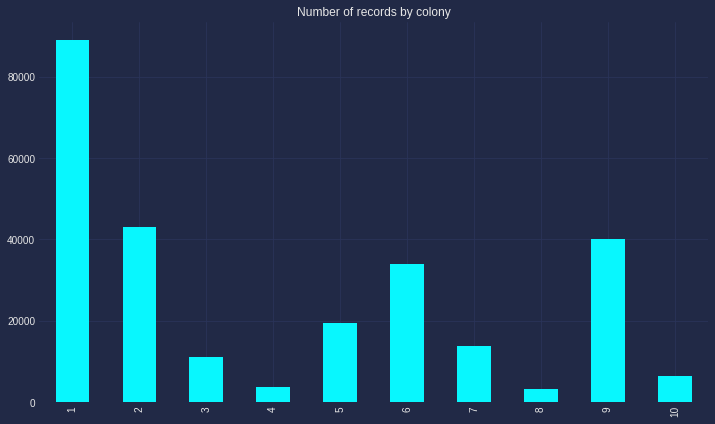

In [22]:
plt.figure(figsize = (12,7))
df.colony2.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of records by colony')
plt.show()

In [23]:
df.bird.value_counts()

104    6048
103    5889
100    5211
98     4532
44     4278
       ... 
93      985
82      916
86      903
81      897
5       506
Name: bird, Length: 108, dtype: int64

In [25]:
df.year.value_counts()

t2012    95795
t2013    92372
t2014    49992
t2011    25559
Name: year, dtype: int64

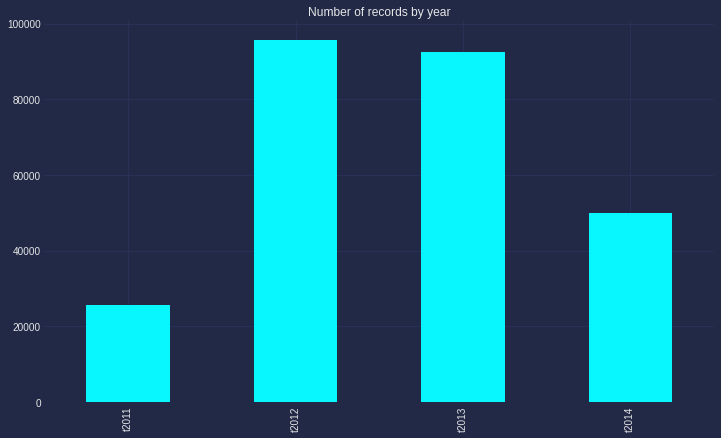

In [26]:
plt.figure(figsize = (12,7))
df.year.value_counts().sort_index().plot(kind = 'bar')
plt.title('Number of records by year')
plt.show()

In [27]:
birds_per_colony = df.groupby(['colony2'])['bird'].nunique()
print(birds_per_colony)

colony2
1     33
2     16
3      7
4      2
5     12
6     16
7      7
8      1
9     10
10     4
Name: bird, dtype: int64


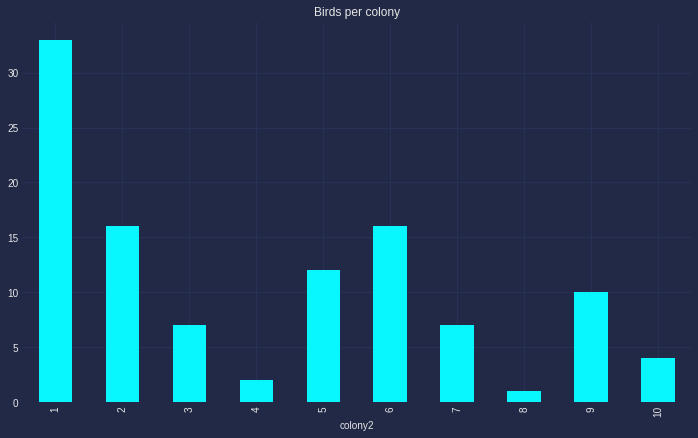

In [28]:
plt.figure(figsize = (12,7))
birds_per_colony.plot(kind='bar')
plt.title('Birds per colony')
plt.show()

In [29]:
df.groupby(['colony2','species'])['bird'].nunique()

colony2  species
1        tCOGU      13
         tEUSH       2
         tRAZO      18
2        tCOGU       5
         tEUSH       2
         tRAZO       9
3        tCOGU       7
4        tEUSH       2
5        tRAZO      12
6        tEUSH       5
         tRAZO      11
7        tCOGU       2
         tEUSH       3
         tRAZO       2
8        tEUSH       1
9        tRAZO      10
10       tCOGU       4
Name: bird, dtype: int64

In [30]:
birds_per_species = df.groupby(['species'])['bird'].nunique()
print(birds_per_species)

species
tCOGU    31
tEUSH    15
tRAZO    62
Name: bird, dtype: int64


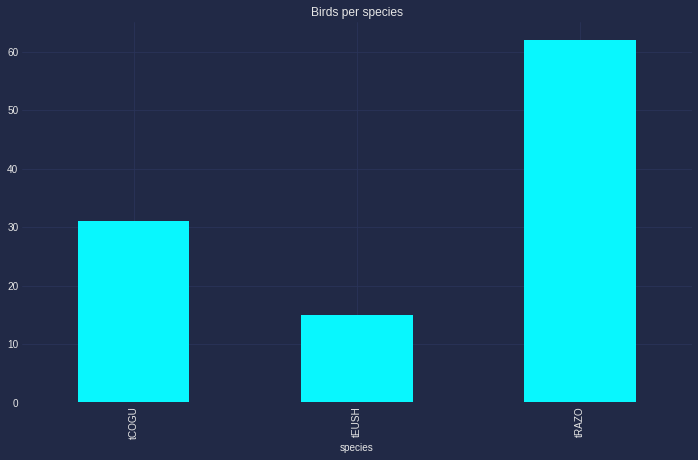

In [31]:
plt.figure(figsize = (12,7))
birds_per_species.plot(kind='bar')
plt.title('Birds per species')
plt.show()

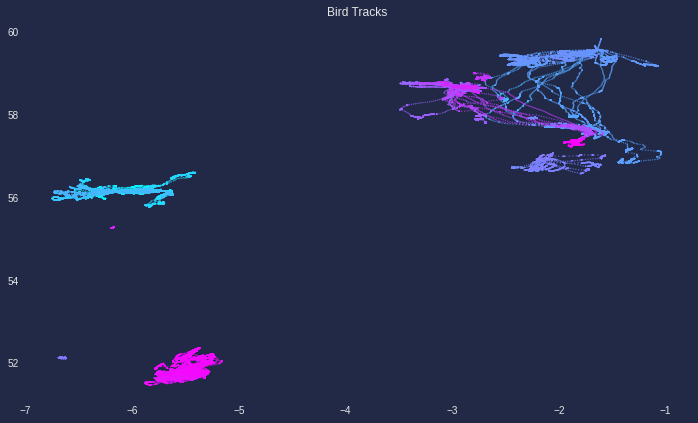

In [33]:
plt.figure(figsize=(12,7))
plt.scatter(df.lon, df.lat, c = df.bird,s = 0.1)
plt.title('Bird Tracks')
plt.show()

In [34]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

countries = gpd.read_file(
               gpd.datasets.get_path("naturalearth_lowres"))

In [35]:
countries.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


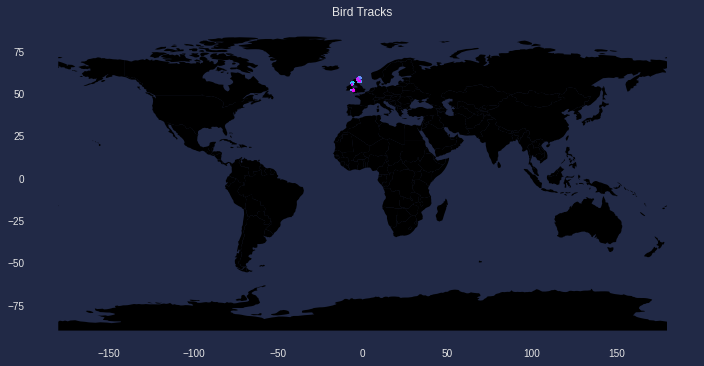

In [42]:
countries.plot(figsize=(12,7),color = 'black')
plt.scatter(df.lon, df.lat, c = df.bird,s = 0.1)
plt.title('Bird Tracks')
plt.grid()
plt.show()

In [47]:
British_Isles = world[(world["name"] == "United Kingdom") | (world["name"] == "Ireland")]

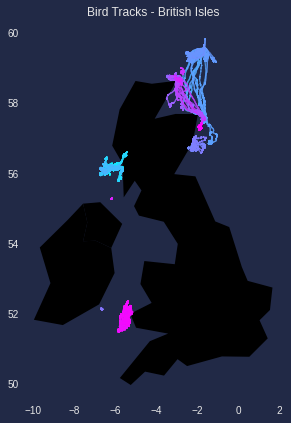

In [53]:
British_Isles.plot(figsize=(12,7),color = 'black')
plt.scatter(df.lon, df.lat, c = df.bird,s = 0.1)
plt.title('Bird Tracks - British Isles')
plt.grid()
plt.show()

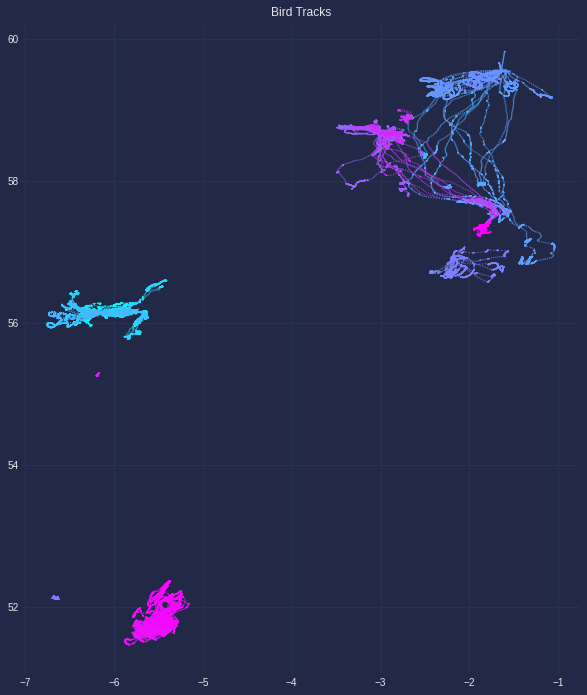

In [52]:
plt.figure(figsize=(10,12))
plt.scatter(df.lon, df.lat, c = df.bird,s = 0.1)
plt.title('Bird Tracks')
plt.show()